# **Big Five Personality Test**

In [ ]:
pip install country_converter

     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for country-converter: filename=country_converter-0.7.3-cp37-none-any.whl size=52306 sha256=e35644a6e2e1bf6520281744a741e72ea5f7d89ca5076f863306fafbd434854d
  Stored in directory: /root/.cache/pip/wheels/26/01/da/3906a4b98db3939e8fafc46724677b37175e5e07236952b36a
Successfully built country-converter


**Import Statement**

In [ ]:
# import statment
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.model_selection import KFold

# **Load Data**

In [ ]:
!mkdir -p ~/.kaggle
!echo '{"username":"hetulparmar","key":"f270dc12a8091249b047c052d442d0b8"}' > ~/.kaggle/kaggle.json
!pip install -q kaggle 
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tunguz/big-five-personality-test
!unzip /content/big-five-personality-test.zip

 94% 149M/159M [00:02<00:00, 84.8MB/s]
100% 159M/159M [00:02<00:00, 63.7MB/s]
Archive:  /content/big-five-personality-test.zip
  inflating: IPIP-FFM-data-8Nov2018/.directory  
  inflating: IPIP-FFM-data-8Nov2018/codebook.txt  
  inflating: IPIP-FFM-data-8Nov2018/data-final.csv  


In [ ]:
data = pd.read_csv('./IPIP-FFM-data-8Nov2018/data-final.csv', delimiter="\t")
sam = data.fillna(0)
print(sam.head(20))

    EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
0    4.0   1.0   5.0  ...       GB               51.5448                 0.1991
1    3.0   5.0   3.0  ...       MY                3.1698                101.706
2    2.0   3.0   4.0  ...       GB               54.9119                -1.3833
3    2.0   2.0   2.0  ...       GB                 51.75                  -1.25
4    3.0   3.0   3.0  ...       KE                   1.0                   38.0
5    3.0   3.0   4.0  ...       SE               59.3333                  18.05
6    4.0   3.0   4.0  ...       US               30.3322               -81.6556
7    3.0   1.0   5.0  ...       MY                2.9927               101.7909
8    2.0   2.0   3.0  ...       GB                53.423                -2.2166
9    1.0   5.0   3.0  ...       FI               60.1708                24.9375
10   3.0   3.0   2.0  ...       UA               50.4333                30.5167
11   3.0   1.0   5.0  ...       PH      

# **Cleaning The Data**

In [ ]:
# For detecting the outliers
def cleanData(colm):  

  value=[]
  index_val=[]
  n = len(colm)
  f = colm
  
  q1 = f.quantile(0.25)
  q3 = f.quantile(0.75) 
  iqr = q3-q1
  
  lb = q1-(iqr*1.5)
  up = q3+(iqr*1.5) 

  print("Quartile One",q1)
  print("Quartile three",q3)
  print("Inter quartile",iqr)
  print("Lower Bound ",lb,"\nUpper Bound ",up)
  
  for iv,oli in enumerate(f):
    if oli > up or oli < lb:
      index_val.append(iv)
      value.append(oli)
  print("value",value)
  print("index value",index_val)
  a=len(value)
  print("Length",a)

cleanData(sam["EXT1_E"])

Quartile One 4783.0
Quartile three 12243.0
Inter quartile 7460.0
Lower Bound  -6407.0 
Upper Bound  23433.0
value [305890.0, 36633.0, 25037.0, 66291.0, 23500.0, 58900.0, 476785.0, 23833.0, 39666.0, 686211.0, 23736.0, 23909.0, 50387.0, 30248.0, 60096.0, 215443.0, 98918.0, 105568.0, 282227.0, 385680.0, 25618.0, 25038.0, 456799.0, 97357.0, 23460.0, 25380.0, 24631.0, 3737106.0, 245149.0, 23988.0, 3643045.0, 26114.0, 33635.0, 1785168.0, 33089.0, 174510.0, 62937.0, 75798.0, 47038.0, 321392.0, 2007649.0, 147827.0, 36054.0, 31139.0, 26006.0, 31071.0, 43345.0, 314619.0, 45578.0, 27720.0, 91356.0, 470104.0, 119232.0, 97990501.0, 586094.0, 30453.0, 31322.0, 104088.0, 29497.0, 29327.0, 29120.0, 52859.0, 430429.0, 29329.0, 148437.0, 531093.0, 501944.0, 33636.0, 61243.0, 352907.0, 58150.0, 677699.0, 27831.0, 51670.0, 50977.0, 69104.0, 70241.0, 56506.0, 23468.0, 123941.0, 24058.0, 55032.0, 89505.0, 227479.0, 60095.0, 39160.0, 57066.0, 8698189.0, 23732.0, 28178.0, 3405113.0, 30137.0, 30915.0, 26762.0,

In [ ]:
#Changing the country column
import country_converter as coco
name = sam["country"]
sample=name.unique() 
s = coco.convert(names=sample, to='name_short')
print(s)

NONE not found in regex
0 not found in ISOnumeric


['United Kingdom', 'Malaysia', 'Kenya', 'Sweden', 'United States', 'Finland', 'Ukraine', 'Philippines', 'France', 'Australia', 'India', 'Canada', 'Netherlands', 'South Africa', 'Hong Kong', 'Brazil', 'Switzerland', 'Thailand', 'Italy', 'Spain', 'United Arab Emirates', 'Croatia', 'Greece', 'Ireland', 'Oman', 'Germany', 'Portugal', 'Singapore', 'not found', 'Romania', 'Norway', 'Bangladesh', 'Brunei Darussalam', 'Nigeria', 'Lithuania', 'Ethiopia', 'Indonesia', 'Belgium', 'Austria', 'Denmark', 'Tanzania', 'Luxembourg', 'Poland', 'Japan', 'Mexico', 'Cyprus', 'Uganda', 'Sri Lanka', 'Turkey', 'Myanmar', 'Colombia', 'Estonia', 'Argentina', 'Iceland', 'Hungary', 'Puerto Rico', 'Pakistan', 'Tunisia', 'Latvia', 'Czech Republic', 'New Zealand', 'Serbia', 'Israel', 'Jamaica', 'Chile', 'Qatar', 'Saudi Arabia', 'Vietnam', 'Kazakhstan', 'Bosnia and Herzegovina', 'Mauritius', 'Egypt', 'Peru', 'not found', 'Slovenia', 'Jordan', 'Taiwan', 'Dominican Republic', 'Algeria', 'Kuwait', 'Morocco', 'Malta', 'T

In [ ]:
# Replace the data with the mean 
def Replace(sample):
  return sample.replace(0,sample.round().mean())
  
sam['EXT1']=Replace(sam['EXT1'])
sam['EXT2']=Replace(sam['EXT2'])
sam['EXT3']=Replace(sam['EXT3'])
sam['EXT4']=Replace(sam['EXT4'])
sam['EXT5']=Replace(sam['EXT5'])
sam['EXT6']=Replace(sam['EXT6'])
sam['EXT7']=Replace(sam['EXT7'])
sam['EXT8']=Replace(sam['EXT8'])
sam['EXT9']=Replace(sam['EXT9'])
sam['EXT10']=Replace(sam['EXT10'])

sam[['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']]=sam[['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']].apply(pd.Series.round)

In [ ]:
sam['AGR1']=Replace(sam['AGR1'])
sam['AGR2']=Replace(sam['AGR2'])
sam['AGR3']=Replace(sam['AGR3'])
sam['AGR4']=Replace(sam['AGR4'])
sam['AGR5']=Replace(sam['AGR5'])
sam['AGR6']=Replace(sam['AGR6'])
sam['AGR7']=Replace(sam['AGR7'])
sam['AGR8']=Replace(sam['AGR8'])
sam['AGR9']=Replace(sam['AGR9'])
sam['AGR10']=Replace(sam['AGR10'])

sam[['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']]=sam[['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']].apply(pd.Series.round)

In [ ]:
sam['OPN1']=Replace(sam['OPN1'])
sam['OPN2']=Replace(sam['OPN2'])
sam['OPN3']=Replace(sam['OPN3'])
sam['OPN4']=Replace(sam['OPN4'])
sam['OPN5']=Replace(sam['OPN5'])
sam['OPN6']=Replace(sam['OPN6'])
sam['OPN7']=Replace(sam['OPN7'])
sam['OPN8']=Replace(sam['OPN8'])
sam['OPN9']=Replace(sam['OPN9'])
sam['OPN10']=Replace(sam['OPN10'])
sam[['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']]=sam[['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']].apply(pd.Series.round)

In [ ]:
sam['EST1']=Replace(sam['EST1'])
sam['EST2']=Replace(sam['EST2'])
sam['EST3']=Replace(sam['EST3'])
sam['EST4']=Replace(sam['EST4'])
sam['EST5']=Replace(sam['EST5'])
sam['EST6']=Replace(sam['EST6'])
sam['EST7']=Replace(sam['EST7'])
sam['EST8']=Replace(sam['EST8'])
sam['EST9']=Replace(sam['EST9'])
sam['EST10']=Replace(sam['EST10'])
sam[['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10']]=sam[['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10']].apply(pd.Series.round)

In [ ]:
sam['CSN1']=Replace(sam['CSN1'])
sam['CSN2']=Replace(sam['CSN2'])
sam['CSN3']=Replace(sam['CSN3'])
sam['CSN4']=Replace(sam['CSN4'])
sam['CSN5']=Replace(sam['CSN5'])
sam['CSN6']=Replace(sam['CSN6'])
sam['CSN7']=Replace(sam['CSN7'])
sam['CSN8']=Replace(sam['CSN8'])
sam['CSN9']=Replace(sam['CSN9'])
sam['CSN10']=Replace(sam['CSN10'])
sam[['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']]=sam[['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']].apply(pd.Series.round)

In [ ]:
# Replace country column with maximum
ls = dict(sam.pivot_table(index=["country"], aggfunc="size"))
keymax = max(ls, key=ls.get)
print(keymax)
sam["country"] = sam["country"].replace([0], "US")

US


In [ ]:
# For checking the column has been replaced or not
ls = dict(sam.pivot_table(index=["country"], aggfunc="size"))
ls
ls.get("US")

546480

# **Plotting the clean Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


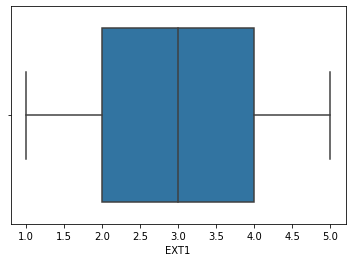

In [ ]:
#Box Plot
box_plot = sn.boxplot(sam['EXT1'])

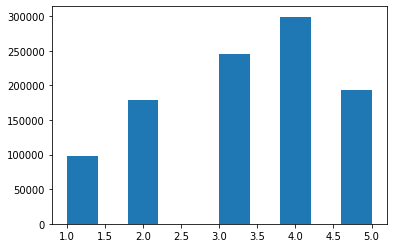

In [ ]:
#Histogram 
plt.hist(sam['EXT5'],bins=10)
plt.show()

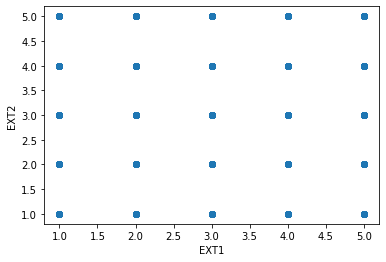

In [ ]:
#Scatter Plot
plt.xlabel('EXT1')
plt.ylabel('EXT2')
plt.scatter(x = sam['EXT1'],y = sam['EXT2'])
plt.show()

# **Model Prediction**

**Prediction- Linear Regression Prediction- Predicting that the person is having vivid imagination on the basis of he/she having openness with excellent ideas, they are quick to understand things.**

In [ ]:
# Divide the data
from sklearn.model_selection import train_test_split
x = sam.loc[:,["OPN5","OPN7","OPN9","OPN10"]].values
y = sam.loc[:,"OPN3"].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
# creation of model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# R-squared Mean
model.score(x_test, y_test)

0.22448334526116775

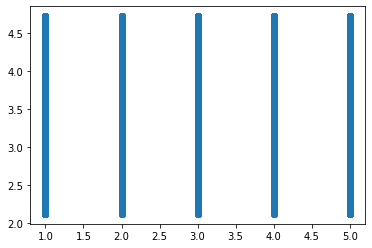

In [ ]:
# Plot the acutal value and predicted value
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

**Prediction-2- Predicting that the person is extrovert on the basis of they like to party and being comfortable around people and don't mind being the center of attention.**

In [ ]:
# Divide the data
from sklearn.model_selection import train_test_split
x = sam.loc[:,["EXT3","EXT7","OPN9","EXT9","AGR10","AGR8"]].values
y = sam.loc[:,"EXT1"].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
 # creation of model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# R-squared
model.score(x_test, y_test)

0.42799919787542906

In [ ]:
# Plot the acutal value and predicted value
predictions = model.predict(x_test)

**Prediction-3- Predicting that the person is easily irritated on the basis of their moods, stress and interest.**

In [ ]:
# Divide the data
from sklearn.model_selection import train_test_split
x = sam.loc[:,["EST6","EST1","EST8","EST9","EST10","AGR8"]].values
y = sam.loc[:,"EST5"].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
 # creation of model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# R-squared
model.score(x_test, y_test)

0.2528892010148195

# Clustering Participants into 5 Personality Groups

In [ ]:
# Drop the extra columns
X=sam.copy()
X.drop(X.columns[50:107], axis=1, inplace=True)
X.drop(X.columns[51:], axis=1, inplace=True)

In [ ]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

df_model = X.drop('country', axis=1)

#fit modelk_fit
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [ ]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,0
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,1
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,1
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,3
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,0


In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)
df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.654332,-1.782358,0
1,-0.200346,3.429982,1
2,-0.939980,2.273763,1
3,1.522560,-0.165030,3
4,-5.244388,3.382976,0


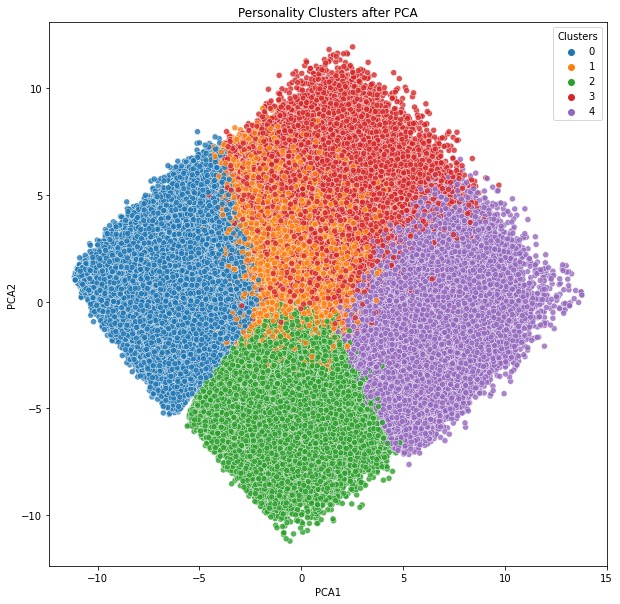

In [ ]:
plt.figure(figsize=(10,10))
sn.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA');

**Implementing the Model to See My Personality**

In [ ]:
my_data = pd.read_csv("Hetul_Personality.csv")
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,4,3,2,2,...,1,4,2,2,5


In [ ]:
my_personality = k_fit.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [1]


In [ ]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sum = pd.DataFrame()
my_sum['extroversion'] = my_data[ext].sum(axis=1)/10
my_sum['neurotic'] = my_data[est].sum(axis=1)/10
my_sum['agreeable'] = my_data[agr].sum(axis=1)/10
my_sum['conscientious'] = my_data[csn].sum(axis=1)/10
my_sum['open'] = my_data[opn].sum(axis=1)/10
my_sum['cluster'] = my_personality
print('Sum of my question groups')
my_sum

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.3,2.3,3.4,3.5,2.7,1


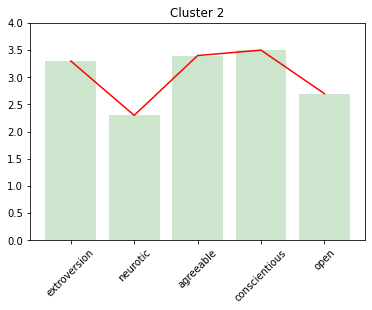

In [ ]:
my_sum_1 = my_sum.drop('cluster', axis=1)
plt.bar(my_sum_1.columns, my_sum_1.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum_1.columns, my_sum_1.iloc[0,:], color='red')
plt.title('Cluster 2')
plt.xticks(rotation=45)
plt.ylim(0,4);